## **Dans se fichier HierarchiqueCluster** <br>

On prend en argument un jeu de données de 317 images RADAR <br>

Le but de ce fichier est de **tester l'algorithmique hiérarchique** en **non supervisé** sur ce jeu de donnée. <br> 

On ne prend donc pas en considération : les tâches, le temps, les effets géométriques. <br>

L'algorithme va classer en rassembler par 

### **Importations**

In [1]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

### **Traitement des images** <br>

#### Chargement des images dans le jeu de donnée

In [3]:
# Répertoire contenant les images radar
image_directory = "../../Image radar/"
image_files = os.listdir(image_directory)

### **Méthode non supervisé hiérarchique** <br>

#### Prépararer les features

In [8]:
def extract_features(edges):
    features = []

    # Recherche des contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Calcul de l'aire
        area = np.sum(contour)
        
        # Calcul du périmètre
        perimeter = len(contour) 
        # Convertir la liste en un tableau numpy
        
        # Calcul de la circularité
        circularity = (4 * np.pi * area) / (perimeter ** 2)

        # Calcul du rectangle englobant
        _, _, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h

        # Calcul des moments et des moments de Hu
        # moments = cv2.moments(contour)
        # hu_moments = cv2.HuMoments(moments).flatten()
        # print("hu", hu_moments)


        # Ajout des caractéristiques à la liste des features
        features.append([area])  #A modifier selon les features que l'on veut area, perimeter, circularity, aspect_ratio, hu_moments
    
    return np.array(features)

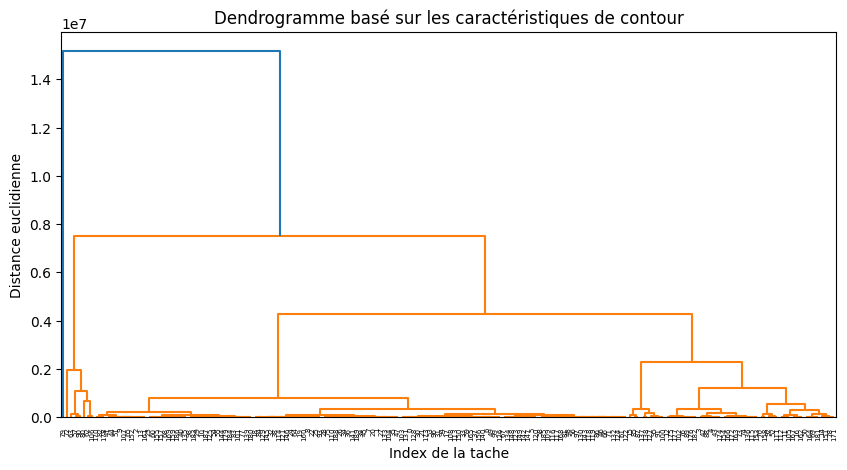

In [12]:
img = cv2.imread(os.path.join(image_directory, image_files[1]), cv2.IMREAD_GRAYSCALE)

# Appliquer l'algorithme de détection de contours (par exemple, Canny)
edges = cv2.Canny(img, 100, 200)
    
feature=extract_features(edges)
    
# Clustering hiérarchique
linkage_matrix = linkage(feature, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme basé sur les caractéristiques de contour')
plt.xlabel('Index de la tache')
plt.ylabel('Distance euclidienne')
plt.show()


In [13]:
# Liste pour stocker les features
features_list = []

# Extraction des caractéristiques de contour pour chaque image
for image_file in image_files:
    img = cv2.imread(os.path.join(image_directory, image_file), cv2.IMREAD_GRAYSCALE)
    
    # Appliquer l'algorithme de détection de contours (par exemple, Canny)
    edges = cv2.Canny(img, 100, 200)
    
    feature=extract_features(edges)
    
    # Ajouter les caractéristiques à la liste
    features_list.append([feature])

# # Normalisation des caractéristiques
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features_list)
print(features_list[1])
# Clustering hiérarchique
linkage_matrix = linkage(features_list[1], method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme basé sur les caractéristiques de contour')
plt.xlabel('Index des images')
plt.ylabel('Distance euclidienne')
plt.show()


[array([[   44522],
       [   94210],
       [  196945],
       [  424201],
       [  440580],
       [   12752],
       [   62659],
       [   99858],
       [   84563],
       [  191210],
       [  145772],
       [  481404],
       [  304892],
       [  193668],
       [  613564],
       [  923605],
       [  536252],
       [   58950],
       [   79590],
       [   86752],
       [   98293],
       [   48696],
       [   84630],
       [  122543],
       [   87753],
       [   82430],
       [  109863],
       [   91712],
       [  104382],
       [  145472],
       [   48113],
       [   49204],
       [   76264],
       [   54316],
       [  107100],
       [   90694],
       [  107996],
       [   61769],
       [   76349],
       [   96512],
       [  129951],
       [  210672],
       [  424268],
       [  448367],
       [  182753],
       [   97281],
       [   31827],
       [   90859],
       [   26305],
       [   63439],
       [  662445],
       [  184683],
       [  8

ValueError: `y` must be 1 or 2 dimensional.